Plots: MapperPlotter
====================

This example illustrates how to plot a `Mapper` using a `MapperPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load example imaging of of a strong lens as an `Imaging` object.

In [2]:
dataset_name = "mass_sie__source_sersic"
dataset_path = path.join("dataset", "imaging", "no_lens_light", dataset_name)

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    pixel_scales=0.1,
)

Now, lets set up a `Grid2D` (using the image of this imaging).

In [3]:
grid = al.Grid2D.uniform(
    shape_native=imaging.shape_native,
    pixel_scales=imaging.pixel_scales,
    sub_size=imaging.image.sub_size,
)

The `Mapper` maps pixels from the image-plane of our `Imaging` data to its source plane, via a lens model.

Lets create a `Tracer` which we will use to create the `Mapper`.

In [4]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), elliptical_comps=(0.111111, 0.0), einstein_radius=1.6
    ),
)
source_galaxy = al.Galaxy(
    redshift=1.0,
    pixelization=al.pix.VoronoiMagnification(shape=(25, 25)),
    regularization=al.reg.Regularization(),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

We can extract the `Mapper` from the `Tracer` by passig it the `Grid2D`.

In [5]:
mapper = tracer.mappers_of_planes_from_grid(grid=grid)[1]

We now pass the mapper to a `MapperPlotter` and call various `figure_*` methods to plot different attributes.

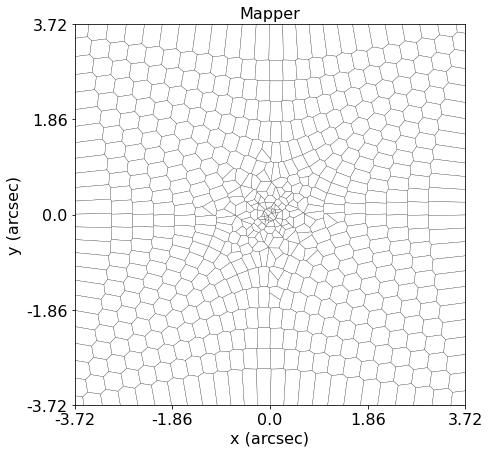

In [6]:
mapper_plotter = aplt.MapperPlotter(mapper=mapper)
mapper_plotter.figure()

The `Mapper` can also be plotted with a subplot of its original image.

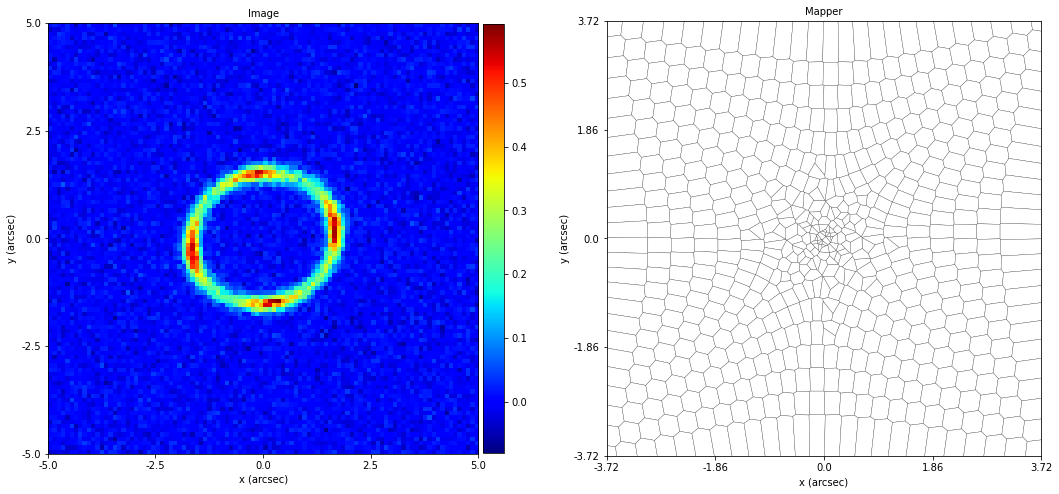

In [7]:
mapper_plotter = aplt.MapperPlotter(mapper=mapper)
mapper_plotter.subplot_image_and_mapper(image=imaging.image)

The Indexes of `Mapper` plots can be highlighted to show how certain image pixels map to the source plane.

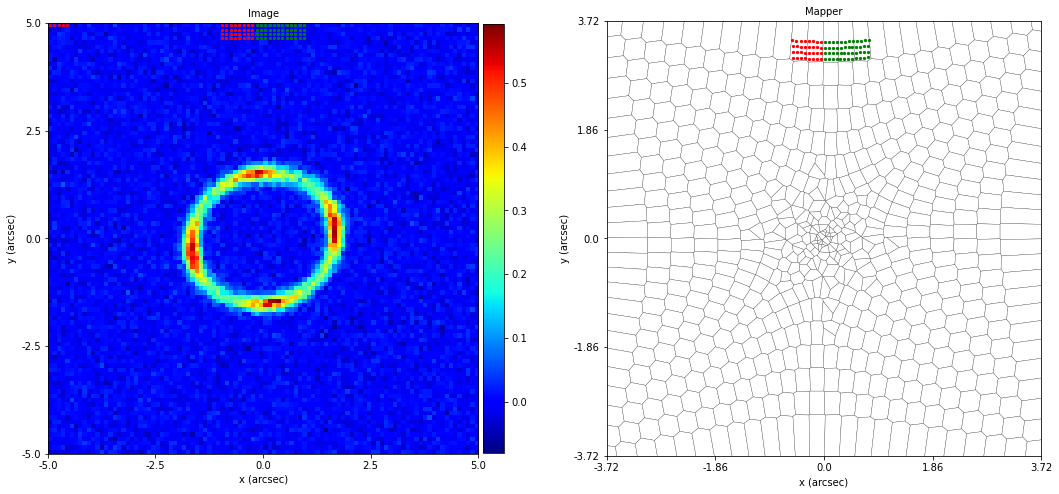

In [8]:
visuals_2d = aplt.Visuals2D(
    indexes=[0, 1, 2, 3, 4], pixelization_indexes=[[10, 11], [12, 13, 14]]
)

mapper_plotter = aplt.MapperPlotter(mapper=mapper, visuals_2d=visuals_2d)
mapper_plotter.subplot_image_and_mapper(image=imaging.image)

A `Mapper` contains the following attributes which can be plotted automatically via the `Include2D` object.

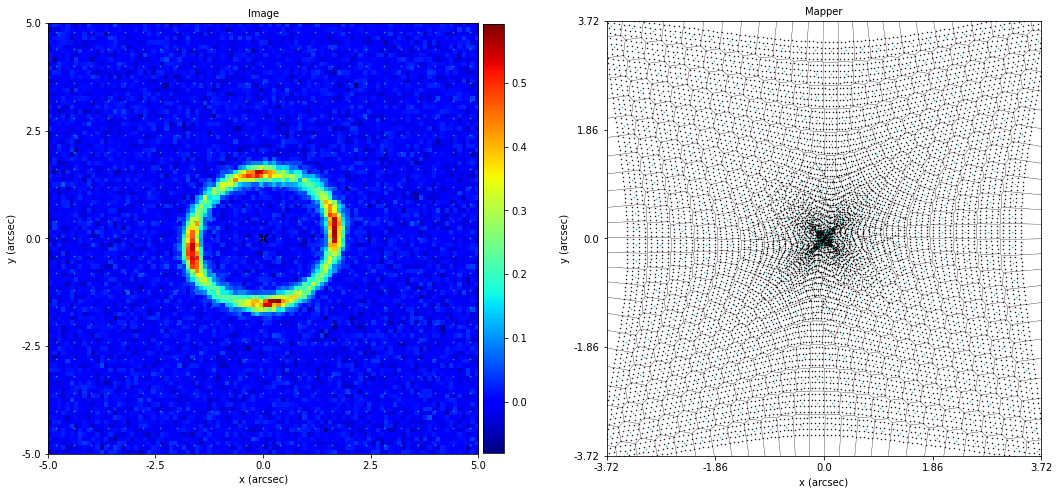

In [9]:
include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    mapper_data_pixelization_grid=True,
    mapper_source_pixelization_grid=True,
    mapper_source_grid_slim=True,
)
mapper_plotter = aplt.MapperPlotter(mapper=mapper, include_2d=include_2d)
mapper_plotter.subplot_image_and_mapper(image=imaging.image)

Finish.